### Toy Model for Floc Size Evolution
This implements the floc model of Winterwerp (1998) using parameters tested in the lab by Keyvani and Strom (2014).

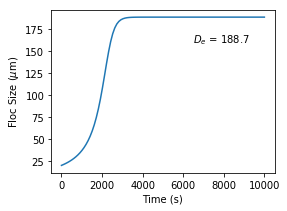

In [1]:
# solve dD/dt = A - B
import numpy as np
from scipy.integrate import odeint
from pylab import *
%matplotlib inline

def dDdt(D, t, k):
    """
    ODE to be integrated: dDdt = A-B
    """
    # kind of constant:
    nf = 2.
    p = 3.-nf
    q = 0.5
    Fy = 10e-10 # (N)
    rhos = 2500.  # (kg/m3)
    mu = 1.002e-3 # dynamic viscosity @ 20 degC (N s m-2)
    
    # adjustable (passed in in array k)
    Ka = k[0]
    Kb = k[1]
    Dp = k[2]
    G =  k[3]
    C =  k[4]
    
    # aggregation and breakup terms
    A = D**(4-nf)*Ka*Dp**(nf-3)*G*C/(nf*rhos)
    B = (D-Dp)**p * D**(2*q+1) *Kb *((Dp**(-p))/nf) *(mu/Fy)**q *G**(q+1)
    dfdt = A-B
    return dfdt


# adjustable params
Dp = 7e-6 # (m)
G = 35. # (s-1)
Ka = 0.73
Kb = 9.5e-6
C = 35.e-3 # (kg/m3)
k = np.array((Ka,Kb,Dp,G,C))

# initial values
D0 = 20e-6 # (m)
t = np.linspace(0.,10000.,100)
# integrate
D = odeint(dDdt,D0,t,args = (k,))

# De = last value
De = 1e6*D[-1]
ts = r"$D_e$ = {0:5.1f}".format(De[0])

# plot
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
plt.plot(t,1e6*D,label='$Floc size$')
plt.xlabel('Time (s)')
plt.ylabel('Floc Size ($\mu$m)')
ax.text(0.65*t[-1],0.85*De,ts)